# Advertising Sales Channel Prediction

## About the Project

Machine Learning Regression model is developed to predict sales based on budgesting spends on various platforms for marketing adn advertising.The features are TV, Radio and Newspaper marketing spend in thousands of dollars.

# Project Overview

* Objective : To predict sales for given budget spend on TV, Radio and Newspaper in dollars

* Regression Problem

* Data cleaning and Data preprocessing

* Exploratory Data Analysis

* Multiple Linear Regression model training and prediction

* Statistical Analysis done from coefficients, p value, R² and Adj. R² value and F-statistic

## Data

Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
advertising_data = pd.read_csv("C:/Users/rahul.tiwari2019/Desktop/Advertising.csv")
advertising_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
advertising_data.shape

(200, 5)

In [12]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


We need to drop Unnamed column because no use of this data

In [15]:
advertising_data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [16]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
advertising_data.shape

(200, 4)

1. All features and Target are float values.

2. There is no NaN or missing values in dataset

In [19]:
advertising_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There is huge spending on TV advertisement on an average 147,000 dollars and minimum on radio of 23,000 dollars

In [20]:
advertising_data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no null values.

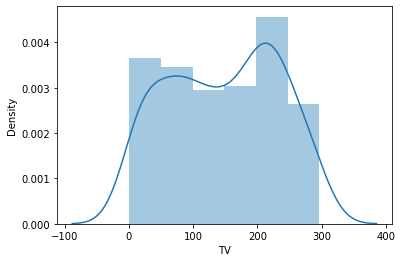

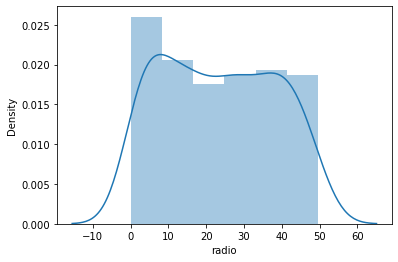

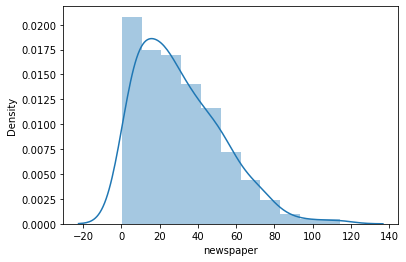

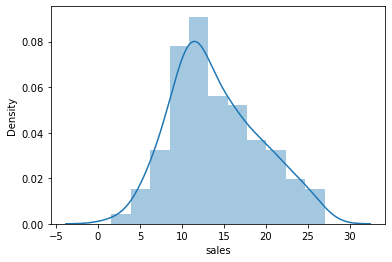

In [22]:
# Outlier Analysis

for i in advertising_data.describe().columns:
    sns.distplot(advertising_data[i].dropna())
    plt.show()

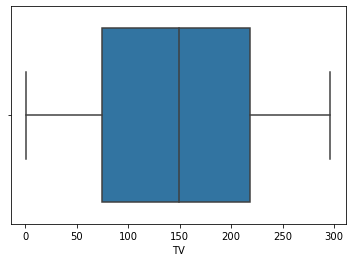

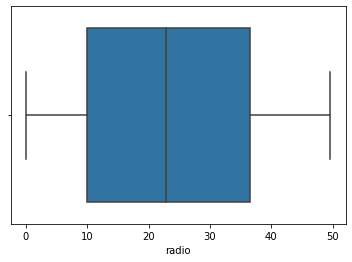

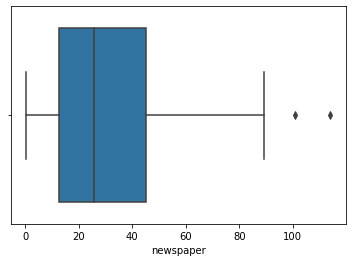

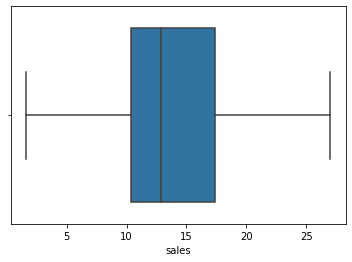

In [23]:
for i in advertising_data.describe().columns:
    sns.boxplot(advertising_data[i].dropna())
    plt.show()

There are no considerable outliers present in data

# EDA

Sales(Target)

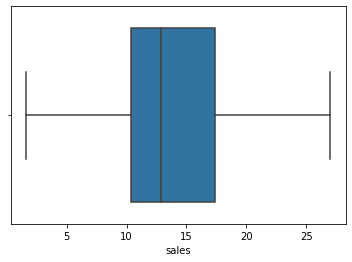

In [26]:
sns.boxplot(advertising_data['sales'])
plt.show()

1. There is no outlier present in target Sales

2. There is average sales of about 15,000 dollars

Features (Predictors)

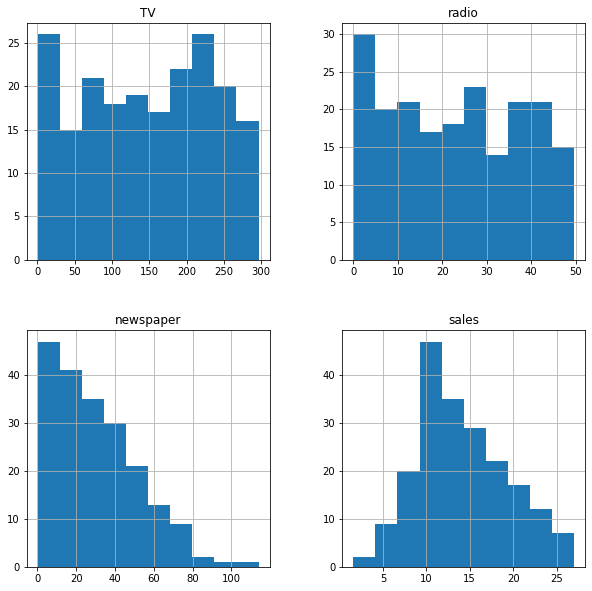

In [27]:
# to check all variables at once

advertising_data.hist( bins = 10, figsize = (10,10))
plt.show()

Spending budget for advertisments on TV is in all range, same for Radio but less than TV. But on newspapers, less budget is spend

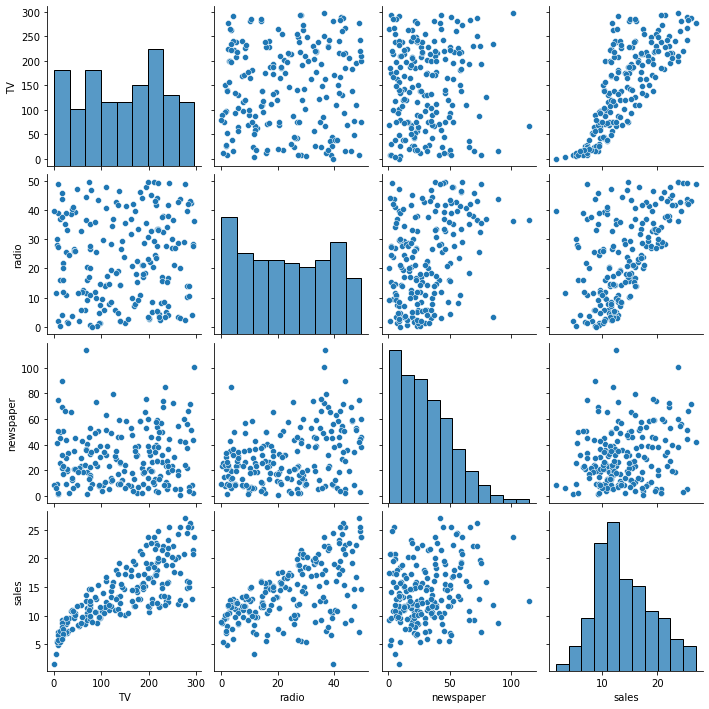

In [28]:
sns.pairplot(advertising_data, size=2.5)
plt.show()

1. Target Sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper.
2. There is no correlation seems between all features.

Let's check with values.

<AxesSubplot:>

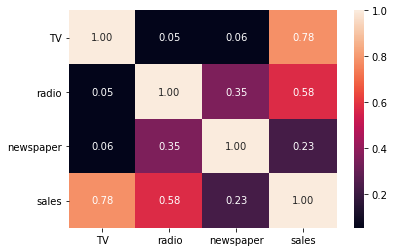

In [30]:
# Calculate correlations
corr = advertising_data.corr()

sns.heatmap(corr,  annot=True, fmt=".2f")

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales

# Data Preprocessing

In [31]:
### Define X&Y ###

X = advertising_data.iloc[:, :-1].values
y = advertising_data.iloc[:, -1].values

In [32]:
### Splitting Dataset ###

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

# Model Training

In [36]:
### Simple Linear Regression/ Multiple Linear Regression ###

from sklearn.linear_model import LinearRegression
lr = LinearRegression( fit_intercept = True)

lr.fit(X_train, y_train)

LinearRegression()

In [37]:
print(f"Linear coefficients : {lr.coef_}")
print(f"Intercept : {lr.intercept_}")

Linear coefficients : [0.04472952 0.18919505 0.00276111]
Intercept : 2.979067338122631


# Model Prediction

In [38]:
y_pred = lr.predict(X_test)

In [40]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

# Metrices

In [41]:
### RMSE ###

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.7815996615334497


In [42]:
### R-squared ###

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

# Tuning

### Estimate the relevancy of the coefficients

Now that you have coefficients, how can you tell if they are relevant to predict your target?

The best way is to find the p-value. The p-value is used to quantify statistical significance; it allows to tell whether the null hypothesis is to be rejected or not.

The null hypothesis?

For any modelling task, the hypothesis is that there is some correlation between the features and the target. The null hypothesis is therefore the opposite: there is no correlation between the features and the target.

So, finding the p-value for each coefficient will tell if the variable is statistically significant to predict the target. As a general rule of thumb, if the p-value is less than 0.05: there is a strong relationship between the variable and the target.

In [43]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        11:57:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

## P value

Looking at all coefficients, we have a p-value that is very low (although it is probably not exactly 0) for TV and Radio. This means that there is a strong correlation between these coefficients and the target (Sales).

Of course, we notice that the third coefficient (the one for newspaper) has a large p-value 0.954. Therefore, ad spending on newspaper is not statistically significant. Removing that predictor would slightly reduce the R² value, but we might make better predictions.

## R² value and Adj. R² value

Then, looking at the R² value and Adj. R² value, we have 0.9. Therefore, about 90% of the variability of sales is explained by the amount spent on all ads

## F-statistic

This is a good indicator of whether there is a relationship between Y and X. The further our F-statistic is away from 1, the better our regression model.The F-statistic is 605.4. This is much greater than 1, and since our data set if fairly small (only 200 data points), it demonstrates that there is a strong relationship between ad spending and sales.

## std error

The coefficient standard error, as mentioned above, measures how much our coefficient estimates vary from the actual average value of our response variable. In other words, it measures the accuracy of coefficient estimates. The closer our standard error is to zero, the better.

## t-value

The coefficient t-value measures how far (in standard deviations) our coefficient estimate is from 0. A large t-value, relative to standard error, would provide evidence against the null hypothesis and indicate that a relationships exists between the predictor and response variables. Predictors with low t-statistics can be dropped. Ideally, the t-value should be greater than 1.96 for a p-value to be less than 0.05.

# Conclusion

To summarise, we have performed a multiple linear regression and have covered some basic introductory statistics as well. This is by no means a comprehensive analysis of the marketing data set but simply an example of how to perform and interpret a mulitple linear regression. It’s a good starting point, especially when attempting to understand the relevance of important statistical concepts like t-statistic, p-value and standard error.

In [44]:
import pickle

In [45]:
filename= 'Advertising Sales channel prediction'
saved_model = (filename)
pickle.dump(lr, open(filename,'wb'))